# The House Price Prediction Model

### Done By - VISHWAK BALAJI

**Problem statement:**
A dataset that records the house prices of 9,761 houses in King County, Washington, US is given. The house prices are recorded along with some other attributes like - area of the house, number of bedrooms, number of bathrooms, etc. 

**objective:** 
The First task is EDA, then fitted a Linear Regression Model, checked the Feature Engineering(used log and created dummy variable) and used Forward selection to find best features. The second task is checked if a Decision Tree Model can be used to fit a data more accurately and then performed Model Testing.

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import os
import pygraphs as pg
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import tree
from sklearn import ensemble
from scipy.stats import randint
import statsmodels.api as stm
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from math import sqrt

## Reading Dataset

In [2]:
data = "wk3_kc_house_train_data.csv"
directory = r"C:\Users\vishw\Videos\DATA SETS\housing project 1"

In [3]:
# Using the pygraphs package to read the dataset
house = pg.DFrame(data,directory)
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1,7237550310,20140512T000000,1230000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
2,9212900260,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,...,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000
3,114101516,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,...,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
4,6054650070,20141007T000000,400000.0,3,1.75,1370,9680,1.0,0,0,...,7,1370,0,1977,0,98074,47.6127,-122.045,1370,10208


In [4]:
# checking the info for this data
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9761 entries, 0 to 9760
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             9761 non-null   int64  
 1   date           9761 non-null   object 
 2   price          9761 non-null   float64
 3   bedrooms       9761 non-null   int64  
 4   bathrooms      9761 non-null   float64
 5   sqft_living    9761 non-null   int64  
 6   sqft_lot       9761 non-null   int64  
 7   floors         9761 non-null   float64
 8   waterfront     9761 non-null   int64  
 9   view           9761 non-null   int64  
 10  condition      9761 non-null   int64  
 11  grade          9761 non-null   int64  
 12  sqft_above     9761 non-null   int64  
 13  sqft_basement  9761 non-null   int64  
 14  yr_built       9761 non-null   int64  
 15  yr_renovated   9761 non-null   int64  
 16  zipcode        9761 non-null   int64  
 17  lat            9761 non-null   float64
 18  long    

In [5]:
# finding the total no.of nan value in  the data frame
house.isnull().sum() 

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## Plotting the Dataset

   **Calling the pygraphs package to plot the histogram, boxplot and barplot.  Also we find, whether the variable is categorical or numerical. After that we plot histogram and boxplot for numerical(Continuous distribustion), then barplot for categorical(discrete distribustion).**

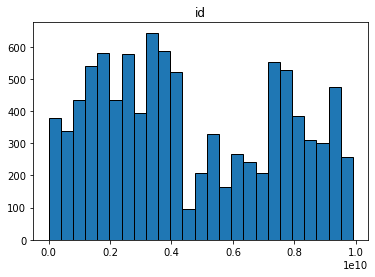

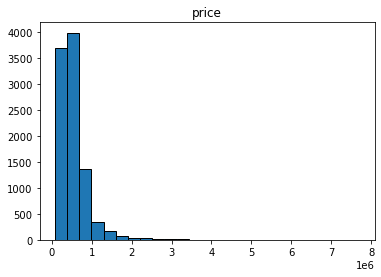

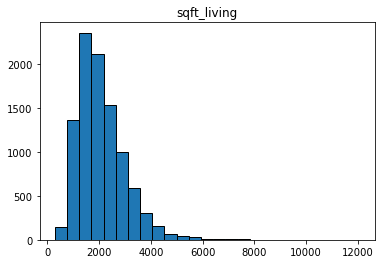

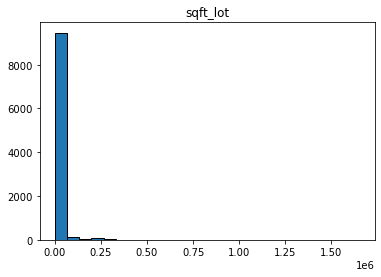

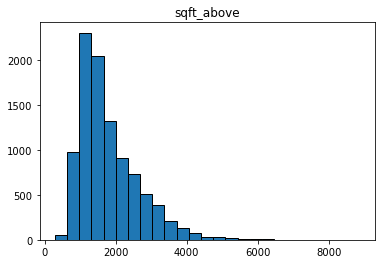

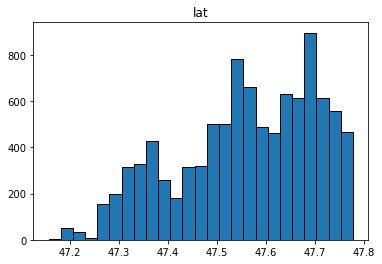

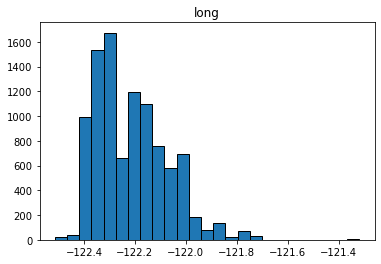

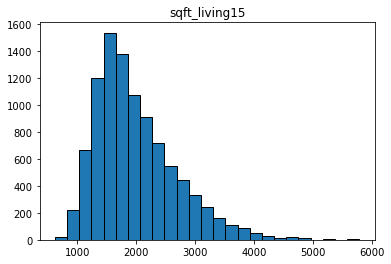

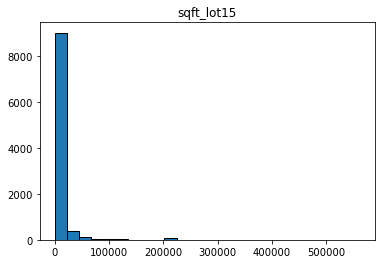

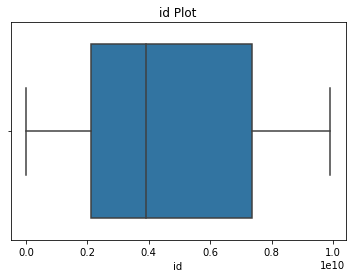

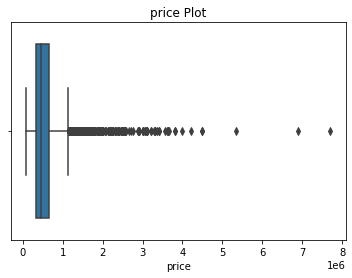

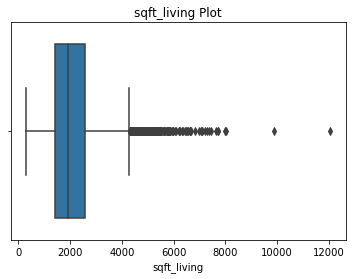

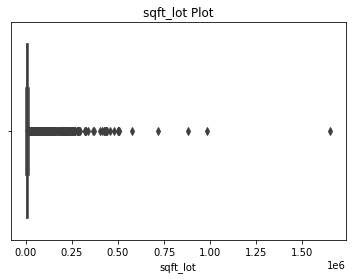

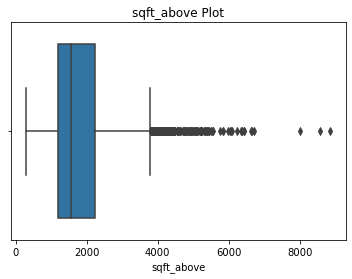

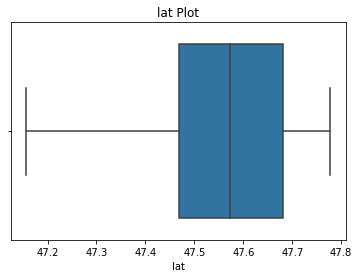

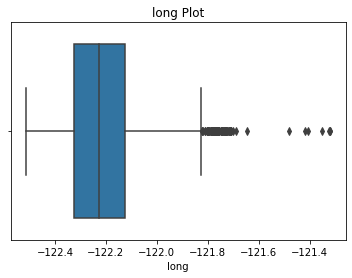

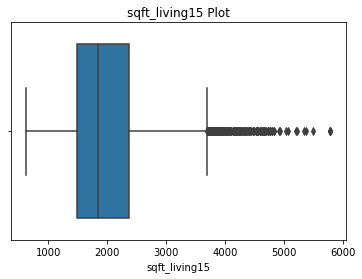

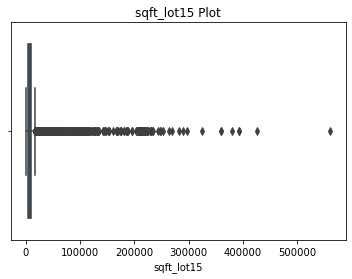

D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


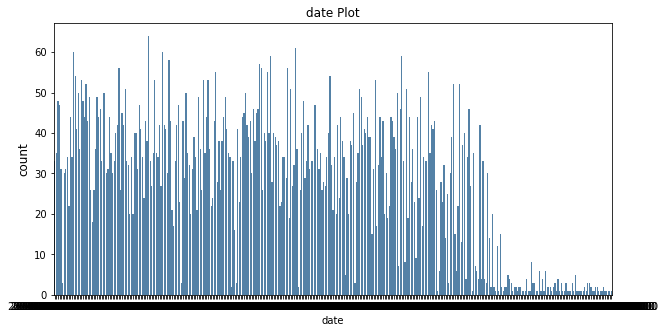

D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


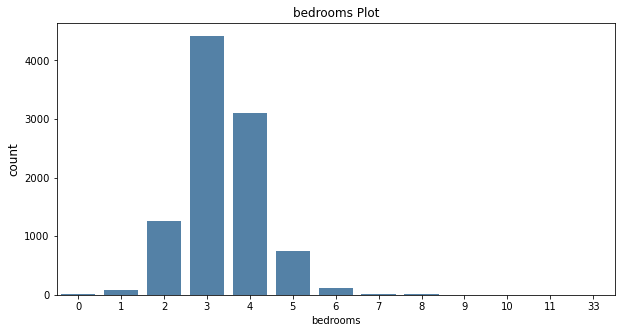

D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


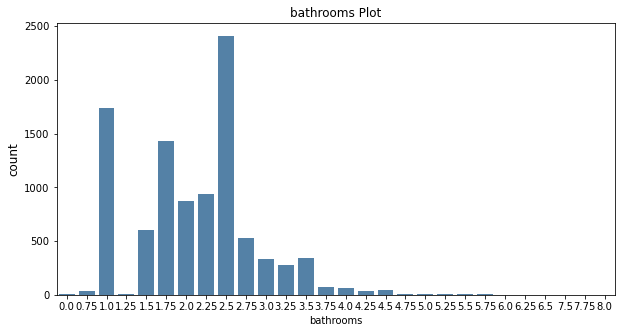

D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


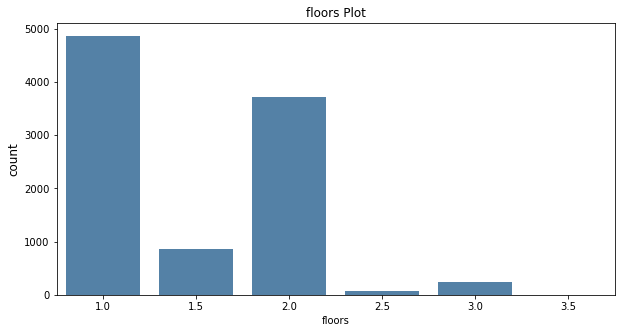

D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


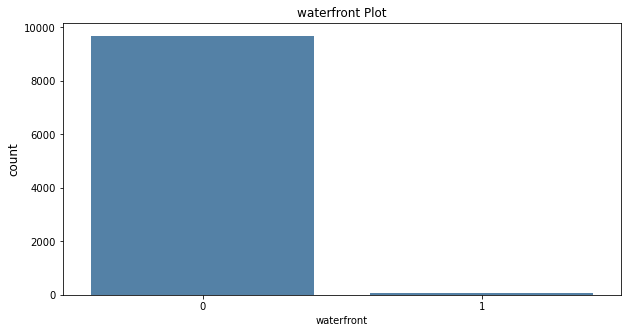

D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


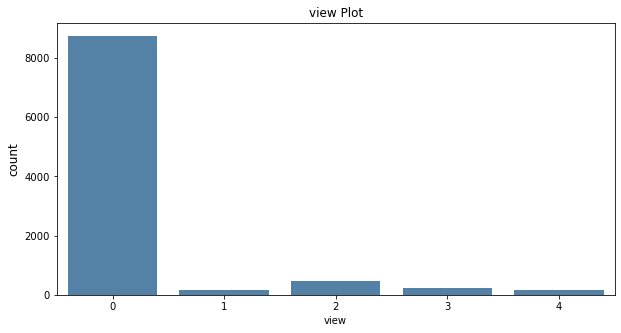

D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


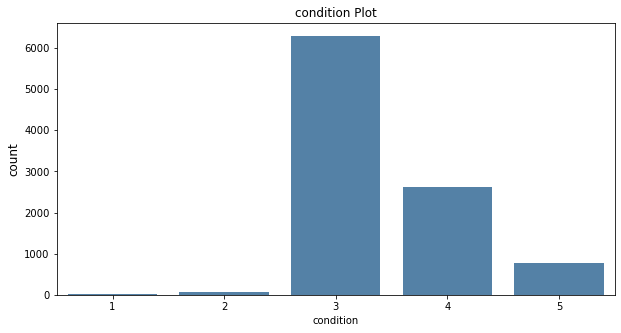

D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


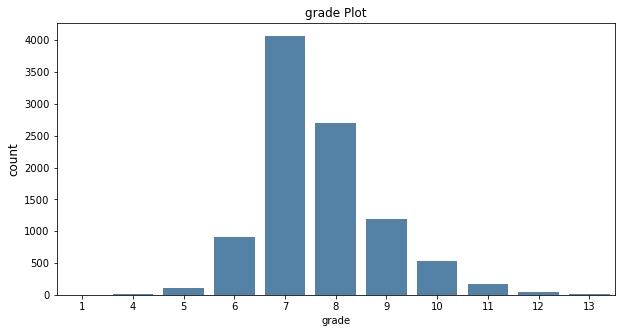

D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


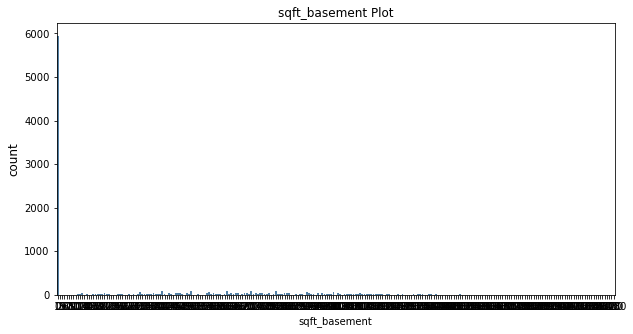

D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


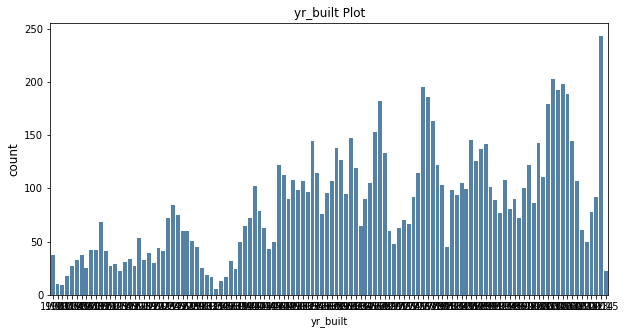

D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


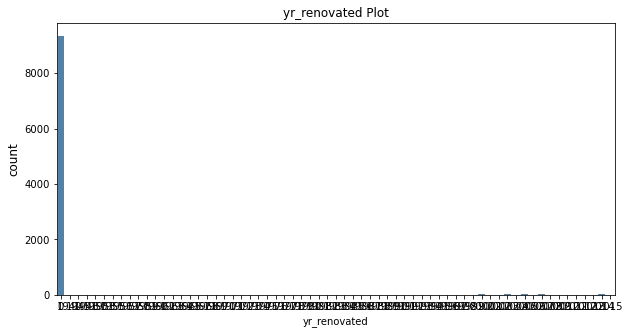

D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


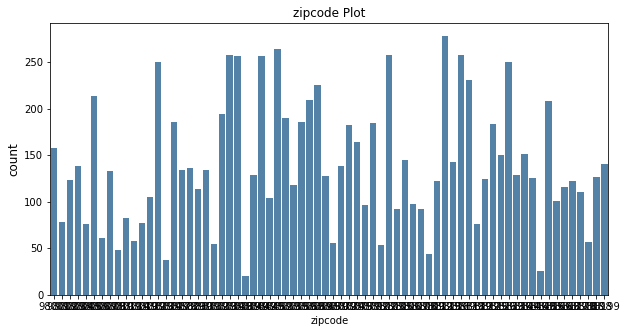

In [6]:
# using the package to plot the dataset
pg.graphs(data,variable = 0,directory=directory)

From the above graph shows the categorical variable("Date, bedroom, bathroom, floors, water_front, View, condition, grade, sqft_basement, yr_renovated, yr_built, zipcode") and numerical variable("id, price, sqft_living, sqft_lot, sqft_above, lat, long, sqft_living15, sqft_lot15"). From this information, I am going to reserch further in EDA.

## EDA(Exploratory Data Analysis)

In [7]:
house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,9.761000e+03,9.761000e+03,9761.000000,9761.000000,9761.000000,9.761000e+03,9761.000000,9761.000000,9761.000000,9761.000000,9761.00000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000
mean,4.605288e+09,5.428336e+05,3.375884,2.117175,2086.734146,1.521526e+04,1.486067,0.008401,0.248028,3.415531,7.66151,1793.291159,293.442987,1970.799508,86.066592,98077.790185,47.560052,-122.214322,1992.359697,12824.785165
std,2.876044e+09,3.797779e+05,0.960697,0.773971,927.194303,4.126673e+04,0.532317,0.091275,0.787877,0.650552,1.18268,835.763817,442.612722,29.240009,405.417369,53.203594,0.140236,0.139895,687.322247,26518.337402
min,1.200019e+06,8.000000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.00000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.514000,620.000000,660.000000
25%,2.126049e+09,3.200000e+05,3.000000,1.750000,1420.000000,5.100000e+03,1.000000,0.000000,0.000000,3.000000,7.00000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.467800,-122.327000,1490.000000,5160.000000
50%,3.905041e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.642000e+03,1.500000,0.000000,0.000000,3.000000,7.00000,1570.000000,0.000000,1975.000000,0.000000,98065.000000,47.572200,-122.229000,1840.000000,7660.000000
75%,7.338403e+09,6.490000e+05,4.000000,2.500000,2570.000000,1.066000e+04,2.000000,0.000000,0.000000,4.000000,8.00000,2230.000000,570.000000,1996.000000,0.000000,98117.000000,47.680400,-122.126000,2370.000000,10113.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,12050.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.00000,8860.000000,3480.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.319000,5790.000000,560617.000000


In [8]:
# checking and changing the outliers for bedroom 

house[house['bedrooms']>10]
#removing the a row from this dataset, due to containg 33 bedrooms in it
house.drop(house.index[house.bedrooms > 10 ],axis = 0,inplace=True)  

In [9]:
# forming the 'date' in correct structure:

house.date = pd.to_datetime(house['date'])
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1,7237550310,2014-05-12,1230000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
2,9212900260,2014-05-27,468000.0,2,1.00,1160,6000,1.0,0,0,...,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000
3,114101516,2014-05-28,310000.0,3,1.00,1430,19901,1.5,0,0,...,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
4,6054650070,2014-10-07,400000.0,3,1.75,1370,9680,1.0,0,0,...,7,1370,0,1977,0,98074,47.6127,-122.045,1370,10208


In [10]:
# adding a new column in the dataset

house['house_age'] = 2020-house['yr_built']          #Calculating the age of the house since construction

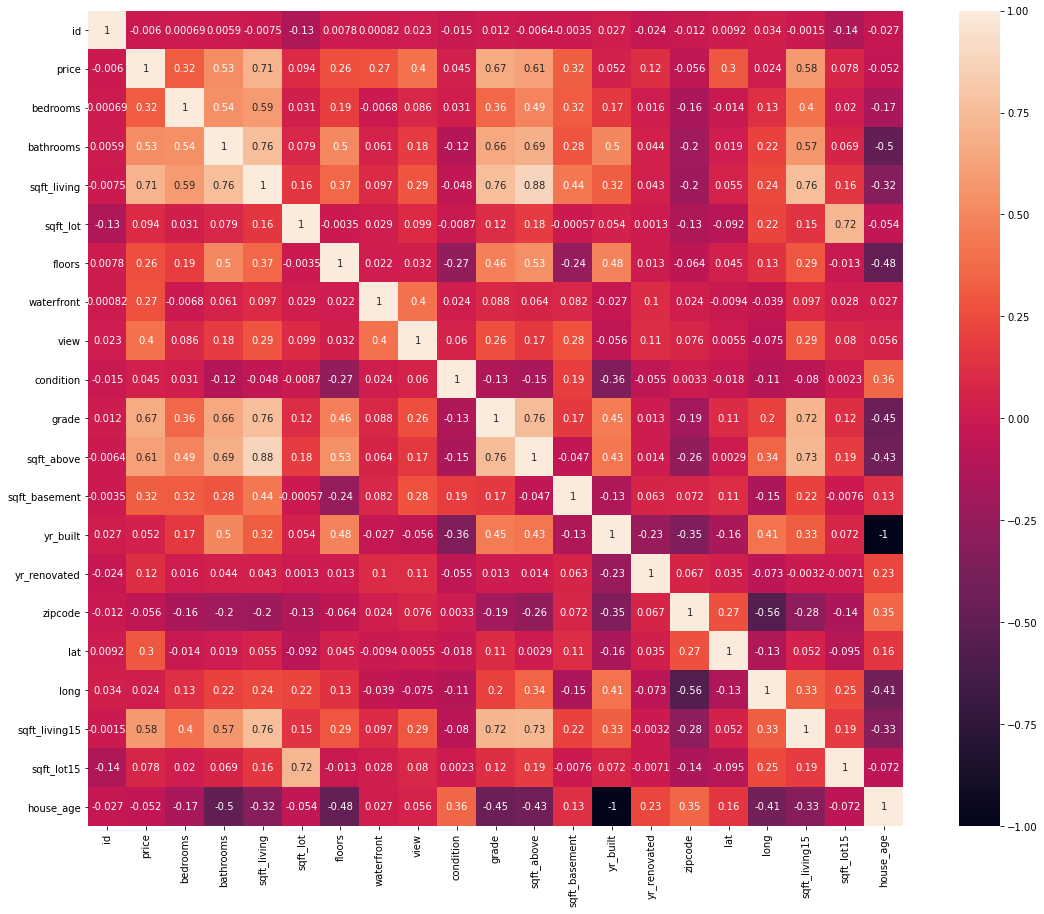

In [11]:
# Seeing the Correlation chart and plotting in the heat map:

correlation = house.corr()
# plotting it in heat map
plt.subplots(figsize=(20,15))
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True,
            annot_kws={'size': 10},square=True)
plt.show()

## 1.Fitting a Linear Regression

In [12]:
# LR model - 1:

X=house[['bedrooms','bathrooms','sqft_living','view','grade','house_age','zipcode']]
y=house['price']
#Splitting the data set into test and train for the train and validation purpose:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 7)

# Standardizing the target variables :
std = StandardScaler()                    #standardizing the function
X_train_std = std.fit_transform(X_train)  #Standardizing the train data
X_test_std = std.transform(X_test)        #Standardizing the test data 
lr = LinearRegression()            #Linear regression function assigned to lr
lr.fit(X_train_std,y_train)        #fitting the model
y_pred = lr.predict(X_test_std)    #predicted value


#Calculating the mean absolute error:  
print("The Mean Absolute Error is  :" ,mean_absolute_error(y_test,y_pred) ) 
#Calculating the R_square value:
print("The R-square is :",r2_score(y_test,y_pred))
print("\n")

# creating a KFold with 10 splits 
folds = KFold(n_splits = 10, shuffle = True, random_state = 100)       #Split of the dataset
scores = cross_val_score(lr, X_train, y_train, scoring='r2', cv=folds)  #fitting the Cross validation
print("The average value obtained in 10-fold cross-validation is : ", np.mean(scores))

The Mean Absolute Error is  : 145699.05483208818
The R-square is : 0.6436537040673258


The average value obtained in 10-fold cross-validation is :  0.6290033193695084


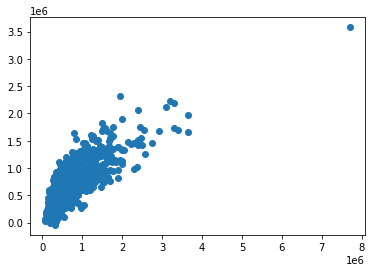

In [13]:
plt.scatter(y_test,y_pred) # scatter plot to show the y_test and y_pred

D:\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

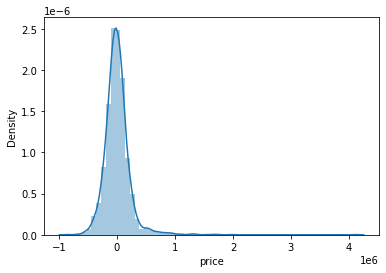

In [14]:
# Residual histogram plot
sns.distplot((y_test-y_pred),bins=60)

In [15]:
# LR model - 2:

X=house[['bedrooms','bathrooms','sqft_living','view','condition','grade','house_age','lat','long','zipcode']]
y=house['price']
#Splitting the data set into test and train for the train and validation purpose:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 7)

# Standardizing the target variables :
std = StandardScaler()                    #standardizing the function
X_train_std = std.fit_transform(X_train)  #Standardizing the train data
X_test_std = std.transform(X_test)        #Standardizing the test data 
lr = LinearRegression()            #Linear regression function assigned to lr
lr.fit(X_train_std,y_train)        #fitting the model
y_pred = lr.predict(X_test_std)    #predicted value


#Calculating the mean absolute error:  
print("The Mean Absolute Error is  :" ,mean_absolute_error(y_test,y_pred) ) 
#Calculating the R_square value:
print("The R-square is :",r2_score(y_test,y_pred))
print("\n")

# creating a KFold with 10 splits 
folds = KFold(n_splits = 10, shuffle = True, random_state = 100)       #Split of the dataset
scores = cross_val_score(lr, X_train, y_train, scoring='r2', cv=folds)  #fitting the Cross validation
print("The average value obtained in 10-fold cross-validation is : ", np.mean(scores))

The Mean Absolute Error is  : 131858.15885527374
The R-square is : 0.682497671203824


The average value obtained in 10-fold cross-validation is :  0.6750661888942302


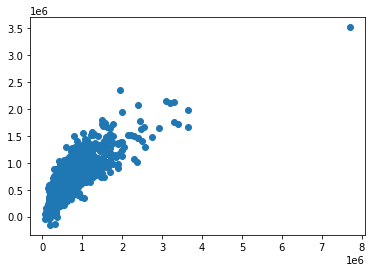

In [16]:
plt.scatter(y_test,y_pred) # scatter plot to show the y_test and y_pred

D:\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

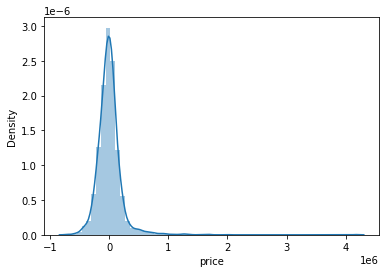

In [17]:
# Residual histogram plot
sns.distplot((y_test-y_pred),bins=60)

## Feature Engineering

In [18]:
# log fitting model - 1:

X=house[['bedrooms','sqft_living','view','grade','house_age','zipcode']]
y=np.log(house['price'])
#Splitting the data set into test and train for the train and validation purpose:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 33)

# Standardizing the target variables :
std = StandardScaler()                    #standardizing the function
X_train_std = std.fit_transform(X_train)  #Standardizing the train data
X_test_std = std.transform(X_test)        #Standardizing the test data 
lr = LinearRegression()            #Linear regression function assigned to lr
lr.fit(X_train_std,y_train)        #fitting the model
y_pred = lr.predict(X_test_std)    #predicted value
y_pred = np.exp(y_pred)
y_test = np.exp(y_test)

#Calculating the mean absolute error:  
print("Using log the Mean Absolute Error is  :" ,mean_absolute_error(y_test,y_pred) ) 
#Calculating the R_square value:
print("Using log the R-square is :",r2_score(y_test,y_pred))
print("\n")

# creating a KFold with 10 splits 
folds = KFold(n_splits = 10, shuffle = True, random_state = 100)       #Split of the dataset
scores = cross_val_score(lr, X_train, y_train, scoring='r2', cv=folds)  #fitting the Cross validation
print("Using log the average value obtained in 10-fold cross-validation is : ", np.mean(scores))
print("Using log the maximum value obtained in 10-fold cross-validation is : ", max(scores))

Using log the Mean Absolute Error is  : 137179.45053521128
Using log the R-square is : 0.6840329245961867


Using log the average value obtained in 10-fold cross-validation is :  0.6346389971263153
Using log the maximum value obtained in 10-fold cross-validation is :  0.6698980340222297


In [19]:
# log fitting model - 2:

X=house[['bathrooms','sqft_living','view','condition','grade','house_age','lat','zipcode']]
y=np.log(house['price'])
#Splitting the data set into test and train for the train and validation purpose:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 33)

# Standardizing the target variables :
std = StandardScaler()                    #standardizing the function
X_train_std = std.fit_transform(X_train)  #Standardizing the train data
X_test_std = std.transform(X_test)        #Standardizing the test data 
lr = LinearRegression()            #Linear regression function assigned to lr
lr.fit(X_train_std,y_train)        #fitting the model
y_pred = lr.predict(X_test_std)    #predicted value
y_pred = np.exp(y_pred)
y_test = np.exp(y_test)

#Calculating the mean absolute error:  
print("Using log the Mean Absolute Error is  :" ,mean_absolute_error(y_test,y_pred) ) 
#Calculating the R_square value:
print("Using log the R-square is :",r2_score(y_test,y_pred))
print("\n")

# creating a KFold with 10 splits 
folds = KFold(n_splits = 10, shuffle = True, random_state = 100)       #Split of the dataset
scores = cross_val_score(lr, X_train, y_train, scoring='r2', cv=folds)  #fitting the Cross validation
print("Using log the average value obtained in 10-fold cross-validation is : ", np.mean(scores))
print("Using log the maximum value obtained in 10-fold cross-validation is : ", max(scores))

Using log the Mean Absolute Error is  : 116923.90549486085
Using log the R-square is : 0.7377736440594497


Using log the average value obtained in 10-fold cross-validation is :  0.760823678449469
Using log the maximum value obtained in 10-fold cross-validation is :  0.7899018077790415


### Fitting a Linear Regression model along with dummy variables('zipcode')

In [20]:
# LR model with dummies:

X=house[['bedrooms','bathrooms','sqft_living','view','condition','grade','house_age','zipcode']]
y=house['price']

# creating a dummy variable for this variable:
d1 = pd.get_dummies(house.zipcode)
X = pd.concat([X,d1],axis = 1)
X.drop(['zipcode'],axis = 1,inplace=True)

#Splitting the data set into test and train for the train and validation purpose:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 7)

# Standardizing the target variables :
std = StandardScaler()                    #standardizing the function
X_train_std = std.fit_transform(X_train)  #Standardizing the train data
X_test_std = std.transform(X_test)        #Standardizing the test data 
lr = LinearRegression()            #Linear regression function assigned to lr
lr.fit(X_train_std,y_train)        #fitting the model
y_pred = lr.predict(X_test_std)    #predicted value


#Calculating the mean absolute error:  
print("The Mean Absolute Error is  :" ,mean_absolute_error(y_test,y_pred) ) 
#Calculating the R_square value:
print("The R-square is :",r2_score(y_test,y_pred))
print("\n")

# creating a KFold with 10 splits 
folds = KFold(n_splits = 10, shuffle = True, random_state = 100)       #Split of the dataset
scores = cross_val_score(lr, X_train, y_train, scoring='r2', cv=folds)  #fitting the Cross validation
print("The average value obtained in 10-fold cross-validation is : ", np.mean(scores))

The Mean Absolute Error is  : 104825.33519545263
The R-square is : 0.7704191250444702


The average value obtained in 10-fold cross-validation is :  0.7703313616701805


## 2.Forward Selection Method

In [21]:
X=house.drop(['price','date','id'],axis='columns')
y=house['price']

#Splitting the data set into test and train for the train and validation purpose:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 33)

#Forward selection:
sfs=SFS(LinearRegression(fit_intercept=True,
    normalize=False,n_jobs=-1),
        k_features=(1,10),
        forward=True,
        floating=False,
        verbose=2,
        cv=4,
        n_jobs=-1).fit(x_train,y_train)

# Printing the accuracy and the features which is obtained by forward selection:
print("Accuracy : ",sfs.k_score_)
print("Feautures selected : ",sfs.k_feature_names_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 out of  19 | elapsed:    3.4s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:    3.7s finished

[2021-07-10 22:13:40] Features: 1/10 -- score: 0.4929047326574203[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  18 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.0s finished

[2021-07-10 22:13:40] Features: 2/10 -- score: 0.5639993419376943[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  17 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:    0.0s finished

[2021-07-10 22:13:40] Features: 3/10 -- score: 0.6123663335703137[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  16

Accuracy :  0.6914807321979142
Feautures selected :  ('bedrooms', 'bathrooms', 'sqft_living', 'waterfront', 'view', 'grade', 'zipcode', 'lat', 'long', 'house_age')


[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished

[2021-07-10 22:13:40] Features: 10/10 -- score: 0.6914807321979142

## 3.Fitting Decision Tree

In [22]:
# DT model - 1:

X=house[['bedrooms','sqft_living','condition','grade','view','house_age','zipcode']]
y=house['price']
#Splitting the data set into test and train for the train and validation purpose:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 7)

#loading the decision tree alogorithm
dt = DecisionTreeRegressor(max_depth = 7,min_samples_leaf =10) 
dt.fit(X_train,y_train)    #Fitting the model
y_pred = dt.predict(X_test) #Predicting the y value's


#Calculating the mean absolute error:  
print ('The Mean Absolute Error is:', mean_absolute_error(y_test, y_pred  ))  
#Calculating the Root of mean squared error value:
print ('The Root Mean Squared Error is:', sqrt(mean_squared_error(y_test,y_pred  )))  
#Calculating the R_square value:
print ('The R-square is:', r2_score(y_test,y_pred))  

The Mean Absolute Error is: 132905.63890251133
The Root Mean Squared Error is: 218953.6188178225
The R-square is: 0.6644257062658592


### Hyperparameter (Grid search CV) for model 1

In [23]:
# Hyperparameter param distance
param_dist = {    
    "max_depth": [3, None],    
    "max_features": randint(1, 9),   
    "min_samples_leaf": randint(1, 9),   
    'criterion' : ['gini','entropy']     
}
# parameter grid
param_grid = { "min_samples_split":[1,2,3,4,5,6,7,None],"min_samples_leaf":[1,2,3]}  
# parameter search
g_search = GridSearchCV(estimator = dt, param_grid = param_grid,    
                                     cv = 5, n_jobs = 1, verbose = 0, return_train_score=True)
# fitting the xtrain and ytrain in grid searchcv
g_search.fit(X_train,y_train) 

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1252, in fit
    super().fit(
  File "D:\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 238, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will

GridSearchCV(cv=5,
             estimator=DecisionTreeRegressor(max_depth=7, min_samples_leaf=10),
             n_jobs=1,
             param_grid={'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [1, 2, 3, 4, 5, 6, 7, None]},
             return_train_score=True)

In [24]:
# taking the best fit out
print("Best Score:",g_search.best_score_) 
print("\n")
# taking the best estimator out
print(g_search.best_estimator_.get_params())  

Best Score: 0.6027403766451002


{'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': 7, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


In [25]:
# DT model - 2:

X=house[['bedrooms','bathrooms','sqft_living','view','condition','grade','house_age','lat','zipcode']]
y=house['price']

# creating a dummy variable for this variable:
d1 = pd.get_dummies(house.zipcode)
X = pd.concat([X,d1],axis = 1)
X.drop(['zipcode'],axis = 1,inplace=True)

#Splitting the data set into test and train for the train and validation purpose:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 7)

#loading the decision tree alogorithm
dt = DecisionTreeRegressor(max_depth = 7,min_samples_leaf =10) 
dt.fit(X_train,y_train)    #Fitting the model
y_pred = dt.predict(X_test) #Predicting the y value's


#Calculating the mean absolute error:  
print ('The Mean Absolute Error is:', mean_absolute_error(y_test, y_pred  ))  
#Calculating the Root of mean squared error value:
print ('The Root Mean Squared Error is:', sqrt(mean_squared_error(y_test,y_pred  )))  
#Calculating the R_square value:
print ('The R-square is:', r2_score(y_test,y_pred))

The Mean Absolute Error is: 110803.14879013317
The Root Mean Squared Error is: 197571.578055323
The R-square is: 0.7267668637127831


### Hyperparameter (Grid search CV) for model 2

In [26]:
# Hyperparameter param distance
param_dist = {    
    "max_depth": [3, None],    
    "max_features": randint(1, 9),   
    "min_samples_leaf": randint(1, 9),   
    'criterion' : ['gini','entropy']     
}
# parameter grid
param_grid = { "min_samples_split":[1,2,3,4,5,6,7,None],"min_samples_leaf":[1,2,3]}  
# parameter search
g_search = GridSearchCV(estimator = dt, param_grid = param_grid,    
                                     cv = 5, n_jobs = 1, verbose = 0, return_train_score=True)
# fitting the xtrain and ytrain in grid searchcv
g_search.fit(X_train,y_train) 

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1252, in fit
    super().fit(
  File "D:\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 238, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will

GridSearchCV(cv=5,
             estimator=DecisionTreeRegressor(max_depth=7, min_samples_leaf=10),
             n_jobs=1,
             param_grid={'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [1, 2, 3, 4, 5, 6, 7, None]},
             return_train_score=True)

In [27]:
# taking the best fit out
print("Best Score:",g_search.best_score_) 
print("\n")
# taking the best estimator out
print(g_search.best_estimator_.get_params())  

Best Score: 0.6824209875362512


{'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': 7, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


## Feature Engineering

In [28]:
# log fitting DT model - 1:

X=house[['bedrooms','sqft_living','view','condition','grade','house_age','zipcode']]
y=np.log(house['price'])
#Splitting the data set into test and train for the train and validation purpose:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 33)

#loading the decision tree alogorithm
dt = DecisionTreeRegressor(max_depth = 7,min_samples_leaf =10) 
dt.fit(X_train,y_train)    #Fitting the model
y_pred = dt.predict(X_test) #Predicting the y value's
y_pred = np.exp(y_pred)
y_test = np.exp(y_test)

#Calculating the mean absolute error:  
print ('The Mean Absolute Error is:', mean_absolute_error(y_test, y_pred  ))  
#Calculating the Root of mean squared error value:
print ('The Root Mean Squared Error is:', sqrt(mean_squared_error(y_test,y_pred  )))  
#Calculating the R_square value:
print ('The R-square is:', r2_score(y_test,y_pred))


The Mean Absolute Error is: 133163.34930850047
The Root Mean Squared Error is: 222316.33929511532
The R-square is: 0.6752655072574925


### Hyperparameter (Grid search CV) for model 1

In [29]:
# Hyperparameter param distance
param_dist = {    
    "max_depth": [3, None],    
    "max_features": randint(1, 9),   
    "min_samples_leaf": randint(1, 9),   
    'criterion' : ['gini','entropy']     
}
# parameter grid
param_grid = { "min_samples_split":[1,2,3,4,5,6,7,None],"min_samples_leaf":[1,2,3]}  
# parameter search
g_search = GridSearchCV(estimator = dt, param_grid = param_grid,    
                                     cv = 5, n_jobs = 1, verbose = 0, return_train_score=True)
# fitting the xtrain and ytrain in grid searchcv
g_search.fit(X_train,y_train) 

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1252, in fit
    super().fit(
  File "D:\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 238, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will

GridSearchCV(cv=5,
             estimator=DecisionTreeRegressor(max_depth=7, min_samples_leaf=10),
             n_jobs=1,
             param_grid={'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [1, 2, 3, 4, 5, 6, 7, None]},
             return_train_score=True)

In [30]:
# taking the best fit out
print("Best Score:",g_search.best_score_) 
print("\n")
# taking the best estimator out
print(g_search.best_estimator_.get_params())  

Best Score: 0.6516641619169355


{'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': 7, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 2, 'min_samples_split': 6, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


In [31]:
# log fitting DT model - 2:

X=house[['bedrooms','bathrooms','sqft_living','view','condition','grade','house_age','lat','zipcode']]
y=np.log(house['price'])
#Splitting the data set into test and train for the train and validation purpose:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 33)

#loading the decision tree alogorithm
dt = DecisionTreeRegressor(max_depth = 7,min_samples_leaf =10) 
dt.fit(X_train,y_train)    #Fitting the model
y_pred = dt.predict(X_test) #Predicting the y value's
y_pred = np.exp(y_pred)
y_test = np.exp(y_test)

#Calculating the mean absolute error:  
print ('The Mean Absolute Error is:', mean_absolute_error(y_test, y_pred  ))  
#Calculating the Root of mean squared error value:
print ('The Root Mean Squared Error is:', sqrt(mean_squared_error(y_test,y_pred  )))  
#Calculating the R_square value:
print ('The R-square is:', r2_score(y_test,y_pred))


The Mean Absolute Error is: 108694.39647273398
The Root Mean Squared Error is: 205640.57280963185
The R-square is: 0.7221545650568659


### Hyperparameter (Grid search CV) for model 2

In [32]:
# Hyperparameter param distance
param_dist = {    
    "max_depth": [3, None],    
    "max_features": randint(1, 9),   
    "min_samples_leaf": randint(1, 9),   
    'criterion' : ['gini','entropy']     
}
# parameter grid
param_grid = { "min_samples_split":[1,2,3,4,5,6,7,None],"min_samples_leaf":[1,2,3]}  
# parameter search
g_search = GridSearchCV(estimator = dt, param_grid = param_grid,    
                                     cv = 5, n_jobs = 1, verbose = 0, return_train_score=True)
# fitting the xtrain and ytrain in grid searchcv
g_search.fit(X_train,y_train) 

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1252, in fit
    super().fit(
  File "D:\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 238, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will

GridSearchCV(cv=5,
             estimator=DecisionTreeRegressor(max_depth=7, min_samples_leaf=10),
             n_jobs=1,
             param_grid={'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [1, 2, 3, 4, 5, 6, 7, None]},
             return_train_score=True)

In [33]:
# taking the best fit out
print("Best Score:",g_search.best_score_) 
print("\n")
# taking the best estimator out
print(g_search.best_estimator_.get_params())  

Best Score: 0.7839086458647327


{'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': 7, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 3, 'min_samples_split': 7, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


### Fitting a Decision Tree model along with dummy variables('zipcode')

In [34]:
# DT model with dummies:

X=house[['bedrooms','bathrooms','sqft_living','view','condition','grade','house_age','lat','zipcode']]
y=house['price']

# creating a dummy variable for this variable:
d1 = pd.get_dummies(house.zipcode)
X = pd.concat([X,d1],axis = 1)
X.drop(['zipcode'],axis = 1,inplace=True)

#Splitting the data set into test and train for the train and validation purpose:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 7)

#loading the decision tree alogorithm
dt = DecisionTreeRegressor(max_depth = 7,min_samples_leaf =10) 
dt.fit(X_train,y_train)    #Fitting the model
y_pred = dt.predict(X_test) #Predicting the y value's


#Calculating the mean absolute error:  
print ('The Mean Absolute Error is:', mean_absolute_error(y_test, y_pred  ))  
#Calculating the Root of mean squared error value:
print ('The Root Mean Squared Error is:', sqrt(mean_squared_error(y_test,y_pred  )))  
#Calculating the R_square value:
print ('The R-square is:', r2_score(y_test,y_pred))

The Mean Absolute Error is: 110803.14879013317
The Root Mean Squared Error is: 197571.578055323
The R-square is: 0.7267668637127831


### Hyperparameter (Grid search CV) for this dummy variable

In [35]:
# Hyperparameter param distance
param_dist = {    
    "max_depth": [3, None],    
    "max_features": randint(1, 9),   
    "min_samples_leaf": randint(1, 9),   
    'criterion' : ['gini','entropy']     
}
# parameter grid
param_grid = { "min_samples_split":[1,2,3,4,5,6,7,None],"min_samples_leaf":[1,2,3]}  
# parameter search
g_search = GridSearchCV(estimator = dt, param_grid = param_grid,    
                                     cv = 5, n_jobs = 1, verbose = 0, return_train_score=True)
# fitting the xtrain and ytrain in grid searchcv
g_search.fit(X_train,y_train) 

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1252, in fit
    super().fit(
  File "D:\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 238, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will

GridSearchCV(cv=5,
             estimator=DecisionTreeRegressor(max_depth=7, min_samples_leaf=10),
             n_jobs=1,
             param_grid={'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [1, 2, 3, 4, 5, 6, 7, None]},
             return_train_score=True)

In [36]:
# taking the best fit out
print("Best Score:",g_search.best_score_) 
print("\n")
# taking the best estimator out
print(g_search.best_estimator_.get_params())  

Best Score: 0.6789300783780463


{'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': 7, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 4, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


## 4.Model Testing

In [37]:
# reading test dataset
data = "wk3_kc_house_test_data.csv"
house1 = pg.DFrame(data,directory)
house1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570
1,1175000570,20150312T000000,530000.0,5,2.00,1810,4850,1.5,0,0,...,7,1810,0,1900,0,98107,47.6700,-122.394,1360,4850
2,16000397,20141205T000000,189000.0,2,1.00,1200,9850,1.0,0,0,...,7,1200,0,1921,0,98002,47.3089,-122.210,1060,5095
3,461000390,20140624T000000,687500.0,4,1.75,2330,5000,1.5,0,0,...,7,1510,820,1929,0,98117,47.6823,-122.368,1460,5000
4,7895500070,20150213T000000,240000.0,4,1.00,1220,8075,1.0,0,0,...,7,890,330,1969,0,98001,47.3341,-122.282,1290,7800


In [38]:
house1.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [39]:
#Rearrange the date in correct format:
house1.date = pd.to_datetime(house1['date'])

In [40]:
#Calculating the age of the house since the begining of the construction
house1['house_age'] = 2020-house1['yr_built']          

In [41]:
# LR model for Test Data:

# For converting the zipcode into binary, first we use the map function
house1['zipcode']= house1['zipcode'].map(str)  

# predictor set of feature
x = house1[['bedrooms','bathrooms','sqft_living','view','condition','grade','lat','house_age','zipcode']] 

# Creating the binary using get_dummies
X = pd.get_dummies(x)   

y = np.log(house1['price'])

#Splitting the data set into test and train for the train and validation purpose:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 33)

# Standardizing the target variables :
std = StandardScaler()                    #standardizing the function
X_train_std = std.fit_transform(X_train)  #Standardizing the train data
X_test_std = std.transform(X_test)        #Standardizing the test data 
lr = LinearRegression()            #Linear regression function assigned to lr
lr.fit(X_train_std,y_train)        #fitting the model
y_pred = lr.predict(X_test_std)    #predicted value
y_pred = np.exp(y_pred)
y_test = np.exp(y_test)

#Calculating the mean absolute error:  
print("The Mean Absolute Error is  :" ,mean_absolute_error(y_test,y_pred) ) 
#Calculating the R_square value:
print("The R-square is :",r2_score(y_test,y_pred))

print("\n")

# creating a KFold with 10 splits 
folds = KFold(n_splits = 10, shuffle = True, random_state = 100)       #Split of the dataset
scores = cross_val_score(lr, X_train, y_train, scoring='r2', cv=folds)  #fitting the Cross validation
print("The average value obtained in 10-fold cross-validation is : ", np.mean(scores))
print("The maximum value obtained in 10-fold cross-validation is : ", max(scores))


The Mean Absolute Error is  : 77235.73772286963
The R-square is : 0.8821545129785402


The average value obtained in 10-fold cross-validation is :  0.855901610823455
The maximum value obtained in 10-fold cross-validation is :  0.8921593384630778


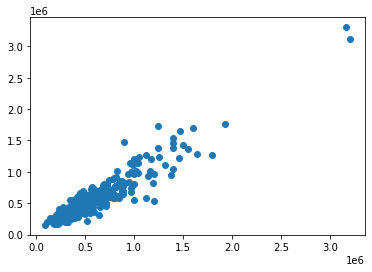

In [42]:
plt.scatter(y_test,y_pred) # scatter plot to show the y_test and y_pred

D:\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

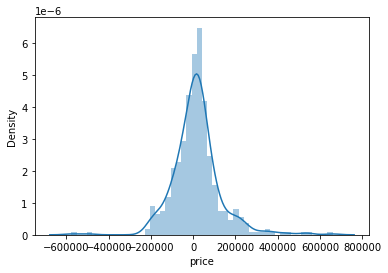

In [43]:
# Residual histogram plot
sns.distplot((y_test-y_pred),bins=50)

## Conclusion
 Let's see if we can interpret the coefficients.


In [44]:
coeffecients = pd.DataFrame(lr.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients.head(10)

,Coeffecient
bedrooms,4.409565e-03
bathrooms,8.614327e-03
sqft_living,2.203338e-01
view,6.142488e-02
condition,3.673577e-02
grade,1.148614e-01
lat,2.094296e-02
house_age,1.511029e-02
zipcode_98001,-5.913006e+10
zipcode_98002,-5.380430e+10


Now, Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **bedrooms** is associated with an **increase of 4.409565e-03  total bedrooms in a house**.
- Holding all other features fixed, a 1 unit increase in **bathrooms** is associated with an **increase of 8.614327e-03  total bathrooms in a house**.
- Holding all other features fixed, a 1 unit increase in **sqft_living** is associated with an **increase of 2.203338e-01  total sqft_living in a house**.
- Holding all other features fixed, a 1 unit increase in **view** is associated with an **increase of 6.142488e-02  total view in a house**.
- Holding all other features fixed, a 1 unit increase in **condition** is associated with an **increase of 3.673577e-02  total condition in a house**.
- Holding all other features fixed, a 1 unit increase in **grade** is associated with an **increase of 1.148614e-01  total grade in a house**.
- Holding all other features fixed, a 1 unit increase in **lat** is associated with an **increase of 2.094296e-02  total latitude of the house**.
- Holding all other features fixed, a 1 unit increase in **house_age** is associated with an **increase of 1.511029e-02  total house_age of the house**.
- etc.,

### The R-square obtained by LR on the test dataset is:0.8821545129785402
### The average R-square value obtained by 10-fold cross-validation on the test dataset is :  0.855901610823455